In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
dataset= pd.read_csv("dataset.csv")
print(dataset)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [4]:
dataset.drop(['education'], inplace=True, axis=1)
dataset.rename(columns ={'male':'Sex_male'}, inplace = True)
print(dataset)

      Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   
...        ...  ...            ...         ...     ...              ...   
4235         0   48              1        20.0     NaN                0   
4236         0   44              1        15.0     0.0                0   
4237         0   52              0         0.0     0.0                0   
4238         1   40              0         0.0     0.0                0   
4239         0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0        

In [5]:
dataset.dropna(axis = 0, inplace = True)
print(dataset.head(), dataset.shape)
print(dataset.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
print(X)

[[  1.    39.     0.   ...  26.97  80.    77.  ]
 [  0.    46.     0.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  0.    52.     0.   ...  21.47  80.   107.  ]
 [  1.    40.     0.   ...  25.6   67.    72.  ]
 [  0.    39.     1.   ...  20.91  85.    80.  ]]


In [8]:
print(y)

[0 0 0 ... 0 0 0]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 14) (2625,)
Test set: (1126, 14) (1126,)


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 1.12728046 -0.65013687 -0.95637902 ...  0.58534896 -0.97449083
  -0.20227508]
 [ 1.12728046 -1.35336163 -0.95637902 ...  0.79435934  0.52675438
  -0.54055465]
 [ 1.12728046  1.10792502 -0.95637902 ... -0.16462945 -2.64254107
  -0.03313529]
 ...
 [ 1.12728046 -0.18132036 -0.95637902 ... -0.17446524  0.35994935
  -0.20227508]
 [ 1.12728046 -0.88454512  1.04561056 ... -0.63920596 -0.89108832
  -1.047974  ]
 [ 1.12728046 -0.767341   -0.95637902 ...  1.51728936 -1.05789335
   0.0514346 ]]


In [12]:
print(X_test)

[[-0.88709069  1.81114978 -0.95637902 ...  0.89271717  0.35994935
   0.47428407]
 [-0.88709069 -1.2361575  -0.95637902 ... -0.39085245 -0.7242833
   0.34742923]
 [-0.88709069 -1.82217813 -0.95637902 ... -1.23672975 -0.7242833
   0.0514346 ]
 ...
 [-0.88709069  1.34233328  1.04561056 ...  3.10085035 -1.55830842
  -0.15999013]
 [-0.88709069  0.75631265 -0.95637902 ...  0.12552613  1.52758452
   0.0514346 ]
 [-0.88709069 -0.767341    1.04561056 ... -1.17279716  1.19397447
   0.55885396]]


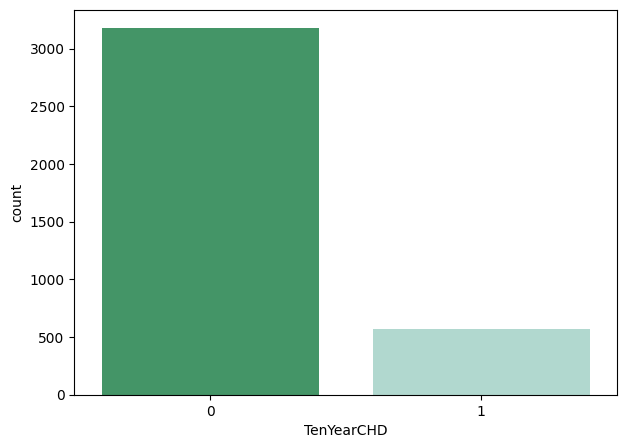

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=dataset, palette="BuGn_r")
plt.show()

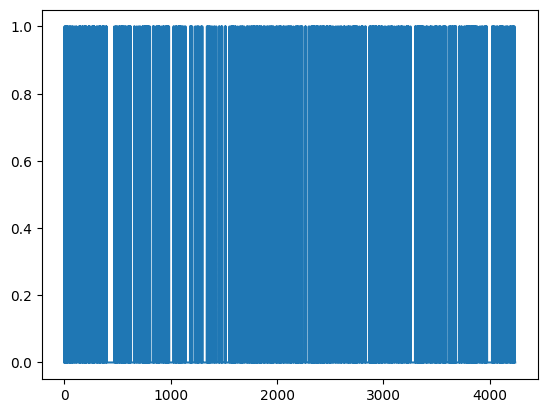

In [14]:
laste = dataset['TenYearCHD'].plot()
plt.show(laste)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8268206039076377


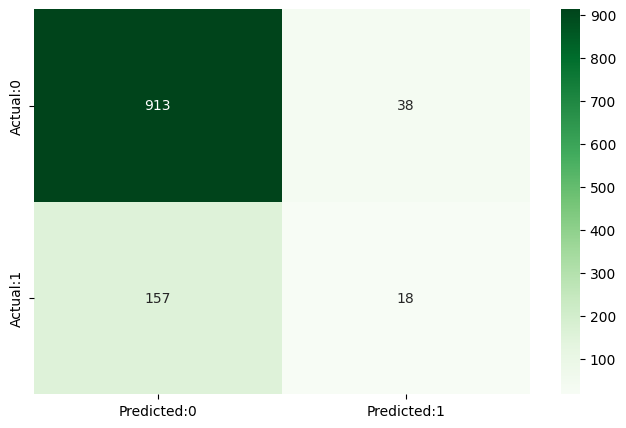

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       951
           1       0.32      0.10      0.16       175

    accuracy                           0.83      1126
   macro avg       0.59      0.53      0.53      1126
weighted avg       0.77      0.83      0.79      1126



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))
